In [1]:
# 모수검증 (parametric test)
# 모집단(population)에 대한 파라미터를 추정하는 방법
#   파라메터 :평균, 분산등 모집단의 관심대상이 되는 전체 데이터를 의미
#   표본(sample) :  모집단에서 선택한 일부 샘플
#   정규분포 : 평균을 중심으로 대칭인 분포
# 표준점수 or z-score 
#    데이터가 정규분포를 따른다고 가정하고 각 값이 평균에서 얼마나 떨어져 있는지 표준편차를 사용해 변환한 점수
#    평균까지의 거리를 표준편차로 나눈것

In [2]:
import numpy as np
import random

In [7]:
temp = [random.randrange(50) for i in range(10)]
s = np.std(temp)
m = np.mean(temp)
z = (5-m) / s
print(temp)
print(list(map(lambda x : (x-m) / s, temp)))
           

[20, 32, 14, 25, 46, 31, 5, 48, 36, 46]
[-0.7507855015569153, 0.1239160536550248, -1.1881362791628853, -0.3863265202186069, 1.1444012014022882, 0.05102425738736312, -1.8441624455718404, 1.2901847939376117, 0.4154832387256715, 1.1444012014022882]


In [8]:
# 라이브러리 이용 z score 구하기
from scipy import stats

In [9]:
stats.zscore(temp)

array([-0.7507855 ,  0.12391605, -1.18813628, -0.38632652,  1.1444012 ,
        0.05102426, -1.84416245,  1.29018479,  0.41548324,  1.1444012 ])

In [10]:
# 정규분포...  정의 및 데이터모양. 그리고 어디에, 어떻게 사용? 
# 표준편차

In [ ]:
# 표준정규분포 : 평균이 0이고 표준편차가 1인 정규분포
#  평균이 0이고 표준편차가 1인을 z-score를 구하면  z = x
# 표준정규분포에서 z점수가 1.0이내에 위치한 샘플은 전체의 약 68%해당
# z-score 2.0이내에 위치한  샘플은 전체의 약 95%

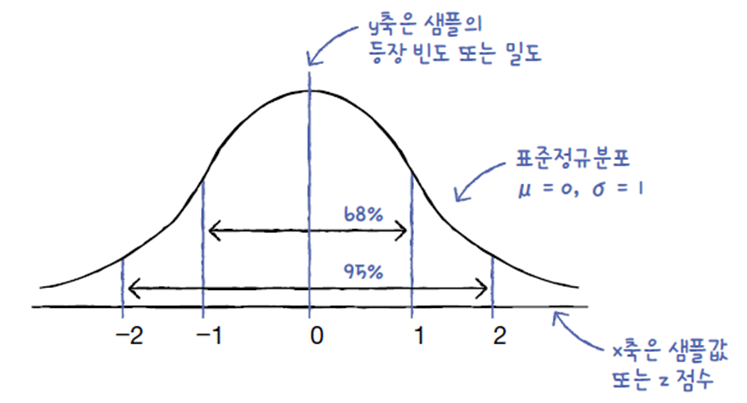

In [11]:
# 누적분포
# stats.norm.cdf() :누적된 분포를 반환
# 표준정규분포에서 평균 0까지 누적분포는 정확히 50%
stats.norm.cdf(0) : # 0까지의 비율

0.5

In [12]:
# 만약 z점수 1이내의 비율을 구하려면 z점수 1까지 누적분포에서 z점수 -1까지의 누적분포를 빼줌
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0)

0.6826894921370859

In [13]:
stats.norm.cdf(2.0) - stats.norm.cdf(-2.0)

0.9544997361036416

In [14]:
# 전체에서 특정 비율에 해당하는 z점수 구하기
stats.norm.ppf(0.9)

1.2815515655446004

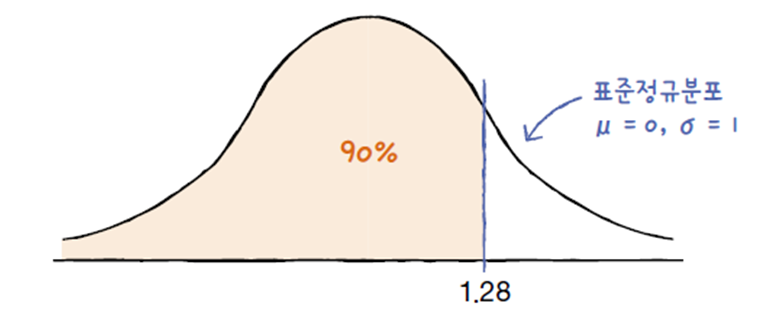

In [15]:
# 중심극한 정리(central limit theorem)  무작위로 샘플을 뽑아 만든 표본의 평균은 정규분포에 가깝다

# 1.모집단에서 샘플을 뽑아 표본을 만들고
# 2.그 표본의 평균을 계산
# 1번과 2번은 대략 1000번 반복해서 1000개의 평균들에 대한 히스토그램을 그리면 정규분포 형태를 취한다.

In [18]:
import gdown
gdown.download('https://github.com/leekyuyoung20230313/pythone/blob/main/datas/ns_202104.zip?raw=true',
               'ns_202104.zip')
!unzip '/content/ns_202104.zip' -d './'

Downloading...
From: https://github.com/leekyuyoung20230313/pythone/blob/main/datas/ns_202104.zip?raw=true
To: /content/ns_202104.zip
100%|██████████| 21.4M/21.4M [00:00<00:00, 133MB/s] 


Archive:  /content/ns_202104.zip
  inflating: ./ns_202104.csv         


In [19]:
import pandas as pd

In [21]:
ns_df = pd.read_csv('./ns_202104.csv',low_memory=False)
ns_df.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN


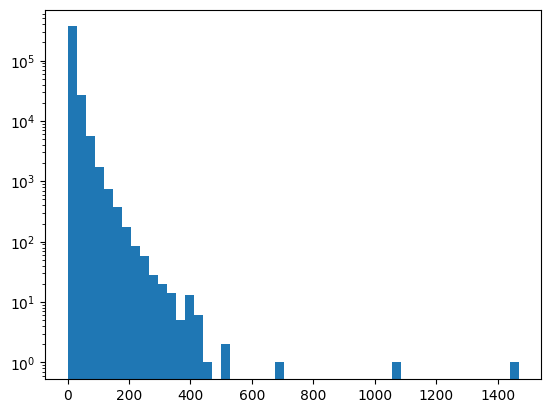

In [24]:
# 대출건수 히스토그램
import matplotlib.pyplot as plt
plt.hist(ns_df['대출건수'],bins=50)
plt.yscale('log')
plt.show()

In [ ]:
# 대출건수의 분포를 보면.... 정규분포와 거리가 있어 보임
# 무작위로 샘플링한 표분의 평균을 히스토그래으로 그려보면 달라짐
a = np.array(list(range(10)))
pd.Series(a).sample(5)

In [38]:
sample_mean = [ns_df['대출건수'].sample(50).mean() for i in range(1000)   ]

(array([ 2.,  2.,  4.,  3.,  7., 11., 18., 34., 41., 50., 52., 41., 50.,
        64., 67., 50., 57., 58., 55., 42., 42., 42., 42., 31., 21., 22.,
        20., 12., 11.,  8.,  9.,  8.,  5.,  3.,  2.,  1.,  1.,  1.,  1.,
         1.,  2.,  3.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([ 5.2   ,  5.5428,  5.8856,  6.2284,  6.5712,  6.914 ,  7.2568,
         7.5996,  7.9424,  8.2852,  8.628 ,  8.9708,  9.3136,  9.6564,
         9.9992, 10.342 , 10.6848, 11.0276, 11.3704, 11.7132, 12.056 ,
        12.3988, 12.7416, 13.0844, 13.4272, 13.77  , 14.1128, 14.4556,
        14.7984, 15.1412, 15.484 , 15.8268, 16.1696, 16.5124, 16.8552,
        17.198 , 17.5408, 17.8836, 18.2264, 18.5692, 18.912 , 19.2548,
        19.5976, 19.9404, 20.2832, 20.626 , 20.9688, 21.3116, 21.6544,
        21.9972, 22.34  ]),
 <BarContainer object of 50 artists>)

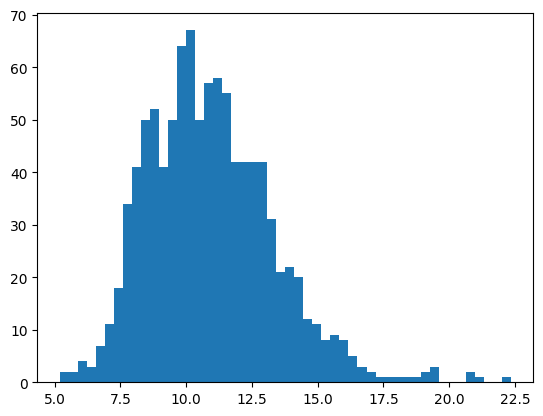

In [39]:
plt.hist(sample_mean,bins=50)

In [40]:
np.mean( sample_mean)

10.92892

In [41]:
ns_df['대출건수'].mean()

10.95429966988812

In [ ]:
# 일반적인 중심극한의정리를 따르려면 샐플링의 크기가 30보다 클수록 좋다.

In [42]:
# 넘파이 함수로 sample_mean 표준편차 구하기  샘플링 50
np.std(sample_mean)

2.395622431352654

In [43]:
# 전체대출건수의 표준편차를 샘플링 개수 50개의 제곱근으로 나누기
np.std(ns_df['대출건수']) / np.sqrt(50)

2.5225123390987996

In [ ]:
# 표본 평균의 표준편차 ----> 표준오차(Standard Error)
# s : 모집단의 표준편차
# n : 표본에 포함된 샘플개수
# SEM = s / sqrt(n)

In [54]:
# 모집단의 평균 범위 추정 : 신뢰구간
# 표본의 파라메터(여기서는 평균)가 속할 것이라 믿는 모집단의 파라미터 범위
# 남산도서관의 파이썬 도서의 대출건수를 사용해서 신뢰구간을 계산
temp = ns_df[ns_df['도서명'].notnull()]
temp = temp[ temp['도서명'].str.contains('파이썬') ]

In [55]:
# 총 도서의 수
len(temp)

311

In [56]:
# 파이썬 도서의 대출건수 평균을계산
temp_mean = temp['대출건수'].mean()
temp_mean

13.260450160771704

In [57]:
# 모집단의 평균을 알수 없고 표본의 평균만 알때 표본의 평균에 대한 z점수
# z = (x-u) / s
# s = std/sqrt(n)

In [58]:
# 중심극한의 정리를 적용
# 모집단의 표준편차가 표본의 표준편차와 비슷하다고 가정
# 모집단의 표준편차 대신 표본이라고 할수 있는 남산도서관의 파이썬 도서 대축건수로 표준편차를 구한다음 표준 오차를 계산
python_std = np.std(temp['대출건수'])
python_se = python_std / np.sqrt(len(temp))
python_se

0.7098168406284588

In [60]:
# 표준오차에 곱할 적절한 z스코어를 결정
# 표본의 평균이 모집단의 평균을 중심으로 95%구간에서 포함된다고 가정
# 95%비율에 해당하는 z점수를 알려면 norm.ppf() 0.975 0.025를 입력
stats.norm.ppf(0.975), stats.norm.ppf(0.025)

(1.959963984540054, -1.9599639845400545)

In [61]:
# 앞에서 구한 표준오차 python_se와 z점수를 곱해서 파이썬 도서의 대출건수평균인 temp_mean이 속할 범위 계산
temp_mean - 1.96*python_se, temp_mean + 1.96*python_se

(11.869209153139925, 14.651691168403483)

In [ ]:
# 표본의 평균 temp_mean이과 표준오차 python_se를 바탕으로 모집단의 평균이 11.87에서 14.65사이에 놓일확률이 95% 확신한다고 해석
# 95% 신뢰구간에서 파이썬도서의 모집단 평균이 11.87에서 14.65사이에 놓여 있다고 해석

In [62]:
# t-검증 : t-distribution 정규분포하고 비슷하지만 중앙은 조금 더 낮고 꼬리가 더 두꺼운 분포
# 표본의 크기가 30이하일때 t-분포를 사용하는것이 좋다  30보다 크면 정규분포와 비슷해짐

In [ ]:
# 귀무가설, 대립가설, p-value  
# p-value가 0.05보다 크다 , 작다.. 